In [22]:
%load_ext autoreload
%autoreload 2

In [35]:
from gaussian_beam.beam.beam import GaussianBeam
from gaussian_beam.components.lens import ThinLens
from gaussian_beam.components.sequence import Sequence
from gaussian_beam.utils.units import *
from gaussian_beam.optimize.focuser import Focuser
from gaussian_beam.optimize.waist_matcher import WaistMatcher

In [36]:
from gaussian_beam.utils.units import *

In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
initial_beam = GaussianBeam(-10 * mm, [1.9378668 * mm, 1.82572056 * mm], 0, 4.48 * W, 10.6 * um)
lens_1 = ThinLens(0 * mm, 25.4 * mm)
lens_2 = ThinLens(10 * mm, 50 * mm)
lens_3 = ThinLens(100 * mm, 500 * mm)
sequence = Sequence([lens_1, lens_2, lens_3], (-20 * mm, 1500 * mm), initial_beam=initial_beam)

In [51]:
collimator= Collimator(sequence=sequence, free_component_index=1, collimation_beam_index=2)
sequence_1 = collimator.run()

waist_matcher = WaistMatcher(sequence=sequence_1, 
                  free_component_index=1, 
                  focus_beam_index=2, 
                  waist_size=4.98313*mm, 
                  optimization_axis=0)
sequence_2 = waist_matcher.run()

focuser = Focuser(sequence=sequence_2, 
                  free_component_index=2, 
                  focus_beam_index=3, 
                  focus_position=800*mm, 
                  optimization_axis=0)
sequence_3 = focuser.run()

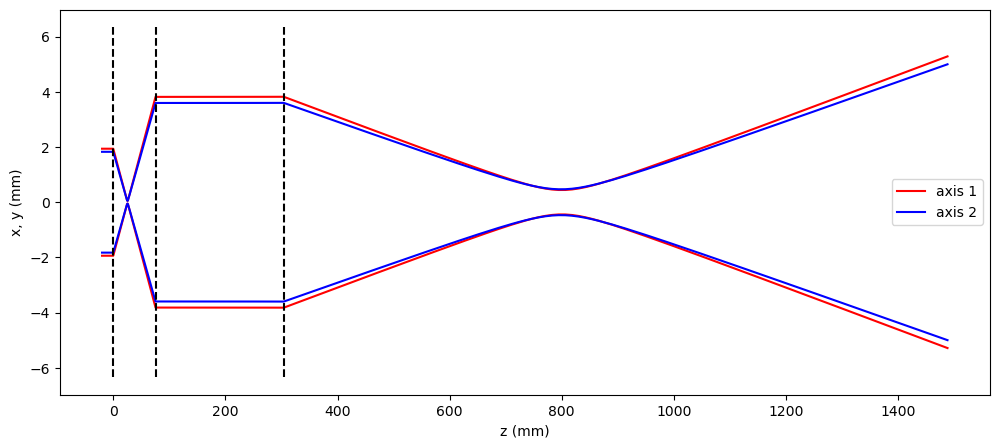

In [52]:
fig, ax = sequence_3.plot_xz()

In [55]:
sequence_3.beams[2].waist

array([0.00381505, 0.00359437])